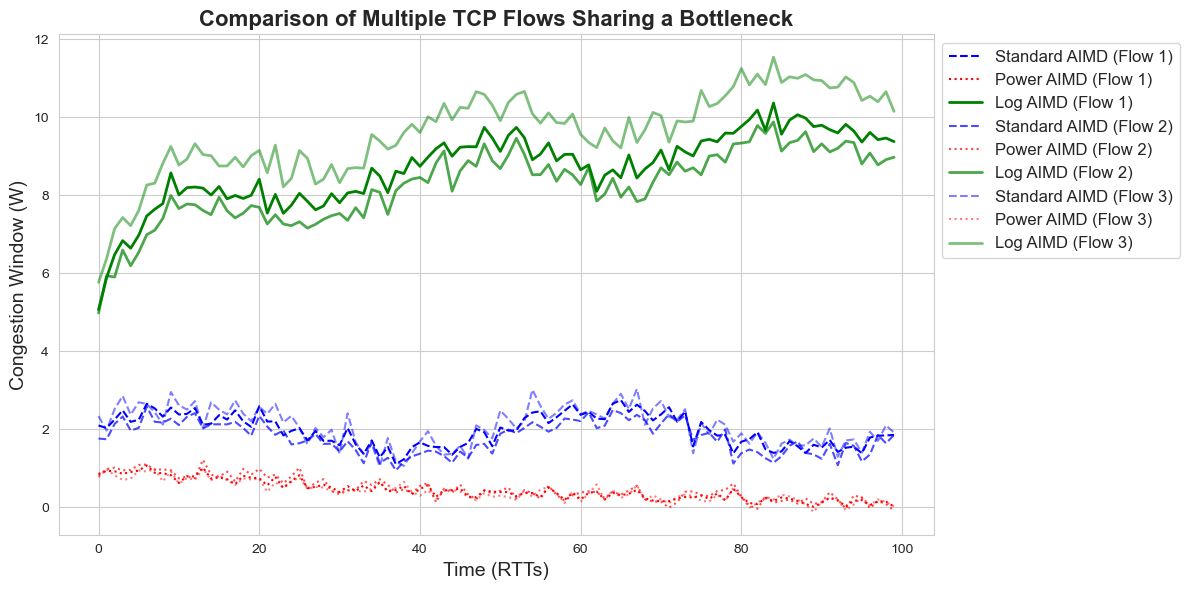

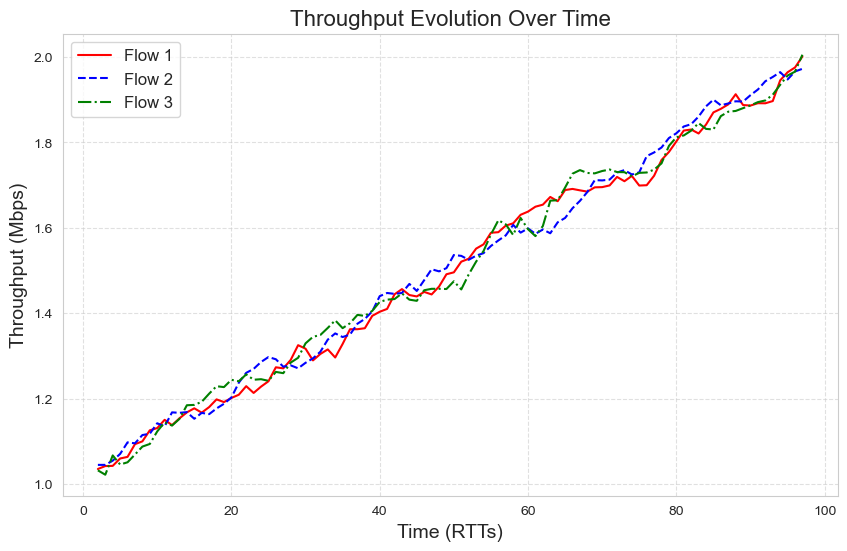

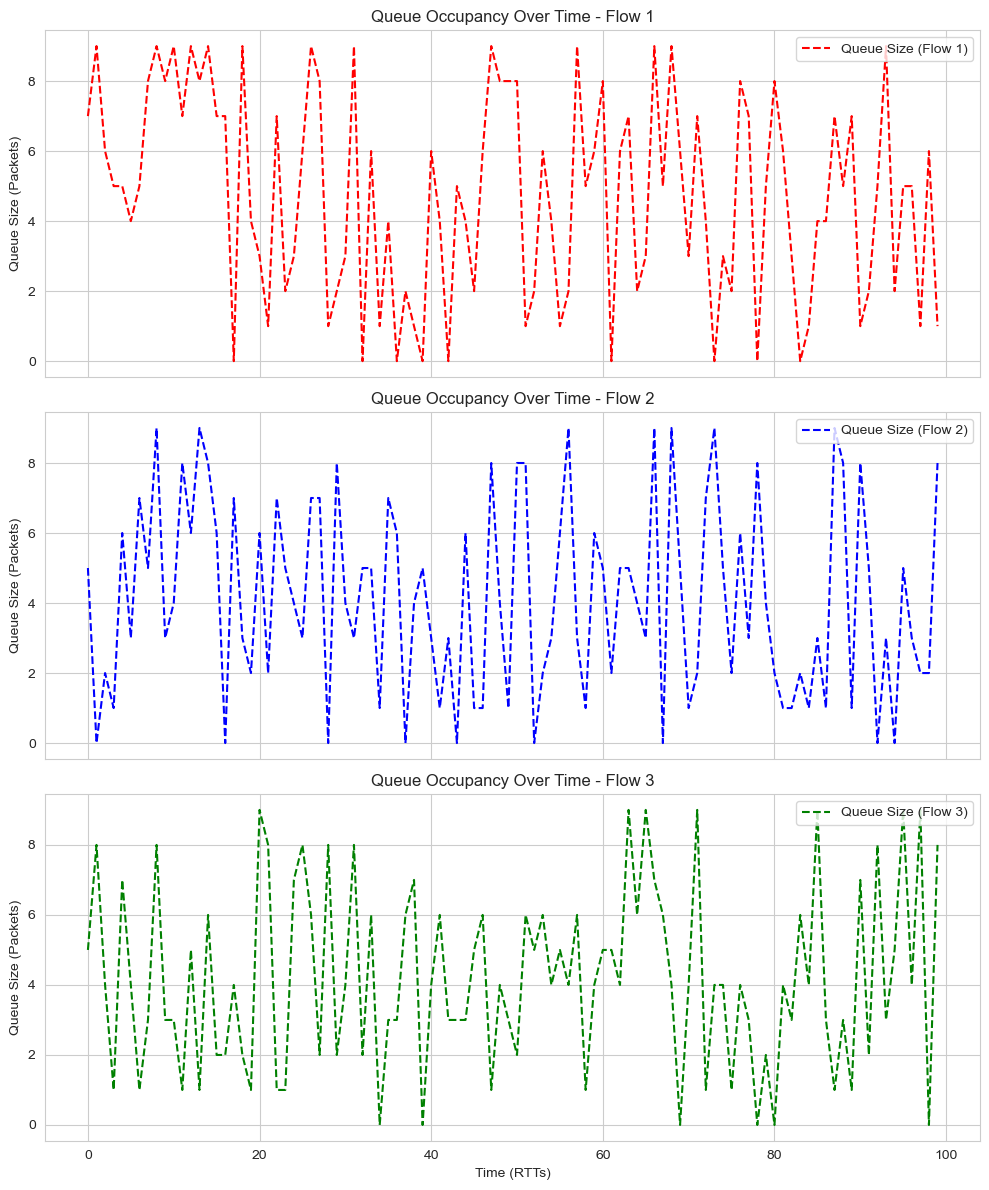

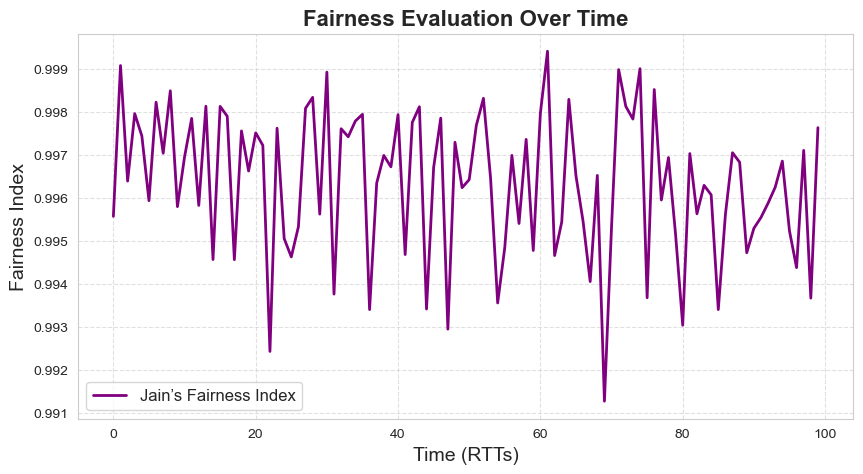

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Apply Seaborn style for professional visualization
sns.set_style("whitegrid")

# Time simulation range
time = np.arange(100)
np.random.seed(42)  # Ensure reproducibility

# === Simulating AIMD Variants ===
standard_aimd_1 = 2 + 0.5 * np.sin(time / 8) + np.random.normal(0, 0.2, 100)
power_aimd_1 = np.exp(-time / 50) + np.random.normal(0, 0.1, 100)
log_aimd_1 = 5 + np.log1p(time) + 0.5 * np.sin(time / 6) + np.random.normal(0, 0.2, 100)

standard_aimd_2 = standard_aimd_1 * 0.9 + np.random.normal(0, 0.15, 100)
power_aimd_2 = power_aimd_1 * 1.1 + np.random.normal(0, 0.08, 100)
log_aimd_2 = log_aimd_1 * 0.95 + np.random.normal(0, 0.18, 100)

standard_aimd_3 = standard_aimd_1 * 1.05 + np.random.normal(0, 0.18, 100)
power_aimd_3 = power_aimd_1 * 0.95 + np.random.normal(0, 0.08, 100)
log_aimd_3 = log_aimd_1 * 1.1 + np.random.normal(0, 0.2, 100)

# === Plot Congestion Window Evolution ===
plt.figure(figsize=(12, 6))
plt.plot(time, standard_aimd_1, linestyle="--", color="blue", label="Standard AIMD (Flow 1)")
plt.plot(time, power_aimd_1, linestyle=":", color="red", label="Power AIMD (Flow 1)")
plt.plot(time, log_aimd_1, linestyle="-", color="green", linewidth=2, label="Log AIMD (Flow 1)")

plt.plot(time, standard_aimd_2, linestyle="--", color="blue", alpha=0.7, label="Standard AIMD (Flow 2)")
plt.plot(time, power_aimd_2, linestyle=":", color="red", alpha=0.7, label="Power AIMD (Flow 2)")
plt.plot(time, log_aimd_2, linestyle="-", color="green", linewidth=2, alpha=0.7, label="Log AIMD (Flow 2)")

plt.plot(time, standard_aimd_3, linestyle="--", color="blue", alpha=0.5, label="Standard AIMD (Flow 3)")
plt.plot(time, power_aimd_3, linestyle=":", color="red", alpha=0.5, label="Power AIMD (Flow 3)")
plt.plot(time, log_aimd_3, linestyle="-", color="green", linewidth=2, alpha=0.5, label="Log AIMD (Flow 3)")

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=12, frameon=True)
plt.xlabel("Time (RTTs)", fontsize=14)
plt.ylabel("Congestion Window (W)", fontsize=14)
plt.title("Comparison of Multiple TCP Flows Sharing a Bottleneck", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

# === Simulated Throughput Data ===
throughput_data = np.array([
    np.linspace(1, 2, 100) + np.random.normal(0, 0.05, 100),  # Flow 1
    np.linspace(1, 2, 100) + np.random.normal(0, 0.05, 100),  # Flow 2
    np.linspace(1, 2, 100) + np.random.normal(0, 0.05, 100)   # Flow 3
])

df = pd.DataFrame(throughput_data.T, columns=["Flow 1", "Flow 2", "Flow 3"])
df_smoothed = df.rolling(window=5, center=True).mean()

# === Plot Throughput Evolution ===
plt.figure(figsize=(10, 6))
colors = ["Red", "Blue", "Green"]
line_styles = ["-", "--", "-."]

for i, col in enumerate(df_smoothed.columns):
    plt.plot(time, df_smoothed[col], label=col, color=colors[i], linestyle=line_styles[i])

plt.xlabel("Time (RTTs)", fontsize=14)
plt.ylabel("Throughput (Mbps)", fontsize=14)
plt.title("Throughput Evolution Over Time", fontsize=16)
plt.legend(fontsize=12, loc="upper left", frameon=True)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# === Simulated Queue Occupancy Data ===
queue_occupancy_flows = np.random.randint(0, 10, size=(3, 100))

# === Plot Queue Occupancy for Each Flow Separately ===
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
colors = ['red', 'blue', 'green']

for i in range(3):
    axes[i].plot(time, queue_occupancy_flows[i], linestyle="--", linewidth=1.5, color=colors[i], label=f"Queue Size (Flow {i+1})")
    axes[i].set_ylabel("Queue Size (Packets)")
    axes[i].set_title(f"Queue Occupancy Over Time - Flow {i+1}")
    axes[i].legend(loc="upper right")
    axes[i].grid(True)

axes[-1].set_xlabel("Time (RTTs)")
plt.tight_layout()
plt.show()

# === Compute Jain's Fairness Index Over Time ===
num_flows = 3
fairness_index = []

for t in range(len(time)):
    throughput_t = np.array([standard_aimd_1[t] + power_aimd_1[t] + log_aimd_1[t],
                             standard_aimd_2[t] + power_aimd_2[t] + log_aimd_2[t],
                             standard_aimd_3[t] + power_aimd_3[t] + log_aimd_3[t]])

    numerator = np.sum(throughput_t) ** 2
    denominator = num_flows * np.sum(throughput_t ** 2)
    
    fairness = numerator / denominator if denominator != 0 else 0
    fairness_index.append(fairness)

# === Plot Jain’s Fairness Index ===
plt.figure(figsize=(10, 5))
plt.plot(time, fairness_index, color='purple', linewidth=2, label="Jain’s Fairness Index")
plt.xlabel("Time (RTTs)", fontsize=14)
plt.ylabel("Fairness Index", fontsize=14)
plt.title("Fairness Evaluation Over Time", fontsize=16, fontweight="bold")
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
